# Regression Modeling Warmup

1. **Using `pydataset`, load the `faithful` dataset and read it's documentation.**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LassoCV
from scipy import stats

In [26]:
from pydataset import data
df = data('faithful')

In [27]:
data('faithful', show_doc=True)

faithful

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Old Faithful Geyser Data

### Description

Waiting time between eruptions and the duration of the eruption for the Old
Faithful geyser in Yellowstone National Park, Wyoming, USA.

### Usage

    faithful

### Format

A data frame with 272 observations on 2 variables.

[,1]

eruptions

numeric

Eruption time in mins

[,2]

waiting

numeric

Waiting time to next eruption (in mins)

### Details

A closer look at `faithful$eruptions` reveals that these are heavily rounded
times originally in seconds, where multiples of 5 are more frequent than
expected under non-human measurement. For a better version of the eruption
times, see the example below.

There are many versions of this dataset around: Azzalini and Bowman (1990) use
a more complete version.

### Source

W. Härdle.

### References

Härdle, W. (1991) _Smoothing Techniques with Implementation in S_. New York:
Springer.

Azzalini, A. 

In [11]:
from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain
frame_splain(df, splain=True)

DATAFRAME SHAPE:
(272, 2) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1 to 272
Data columns (total 2 columns):
eruptions    272 non-null float64
waiting      272 non-null int64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB
None 

DATAFRAME DESCRIPTION:
           count       mean        std   min       25%   50%       75%   max
eruptions  272.0   3.487783   1.141371   1.6   2.16275   4.0   4.45425   5.1
waiting    272.0  70.897059  13.594974  43.0  58.00000  76.0  82.00000  96.0 

DATAFRAME HEAD:
   eruptions  waiting
1      3.600       79
2      1.800       54
3      3.333       74
4      2.283       62
5      4.533       85 



2. **What is pearson's r for the two variables?**

In [24]:
cor = df.corr()
r_eruptions_waiting = cor.iloc[1][0]
print("Pearson's r:", r_eruptions_waiting)

Pearson's r: 0.9008111683218134


3. **Visualize the relationship between the variables.**

In [129]:
X_df=df[['waiting']]
X_vals=df.waiting
y_vals=df['eruptions']

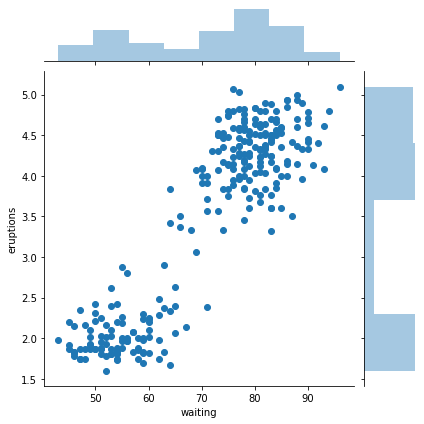

In [130]:
sns.jointplot(x=X_vals, y=y_vals)

4. **Build a linear model that predicts eruptions based on waiting.**

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [133]:
model = LinearRegression().fit(X_df,y_vals)

In [134]:
pred = model.predict(X_df)

rmse = sqrt(mean_squared_error(y_vals, pred))

5. **Create a visualization with your predictions**

    i. waiting should be on the x axis, and eruptions on the y
    
    ii. Use color to differentiate the actual vs predicted values.
    
    iii. Add a descriptive title.
    
    iv. Change the y ticks such that they are all integers (i.e. no decimals)
    
    v. Add the root mean squared error of your predictions as an annotation

Text(45, 4, 'RMSE: 0.4947')

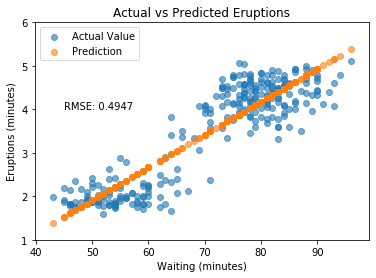

In [135]:
plt.scatter(X_df, y_vals, label='Actual Value', alpha=.6)
plt.scatter(X_df, pred, label='Prediction', alpha=.6)
plt.xlabel('Waiting (minutes)')
plt.ylabel('Eruptions (minutes)')
plt.title('Actual vs Predicted Eruptions')
plt.legend()
plt.yticks(range(1,7))
plt.text(45, 4, f'RMSE: {rmse:.4f}')

**And add melting ...**

In [157]:
df_pred = df[['waiting', 'eruptions']].rename_axis('idx_val')

In [158]:
df_pred['pred'] = pred

In [160]:
df_pred = df_pred.sort_values(by='idx_val')

In [161]:
frame_splain(df_pred, splain=True)

DATAFRAME SHAPE:
(272, 3) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1 to 272
Data columns (total 3 columns):
waiting      272 non-null int64
eruptions    272 non-null float64
pred         272 non-null float64
dtypes: float64(2), int64(1)
memory usage: 8.5 KB
None 

DATAFRAME DESCRIPTION:
           count       mean        std        min        25%        50%  \
waiting    272.0  70.897059  13.594974  43.000000  58.000000  76.000000   
eruptions  272.0   3.487783   1.141371   1.600000   2.162750   4.000000   
pred       272.0   3.487783   1.028160   1.377986   2.512405   3.873708   

                 75%        max  
waiting    82.000000  96.000000  
eruptions   4.454250   5.100000  
pred        4.327476   5.386267   

DATAFRAME HEAD:
         waiting  eruptions      pred
idx_val                              
1             79      3.600  4.100592
2             54      1.800  2.209893
3             74      3.333  3.722452
4             62      2.283

In [176]:
df_melt = df_pred.reset_index()



In [ ]:
df_melt = df_melt.melt(id_vars=['idx_val','waiting'])

In [177]:
df_melt.head(10)

,idx_val,waiting,eruptions,pred
0,1,79,3.600,4.100592
1,2,54,1.800,2.209893
2,3,74,3.333,3.722452
3,4,62,2.283,2.814917
4,5,85,4.533,4.554360
5,6,55,2.883,2.285521
6,7,88,4.700,4.781243
7,8,85,3.600,4.554360
8,9,51,1.950,1.983009
9,10,85,4.350,4.554360


In [142]:
frame_splain(df_melt, splain=True)

DATAFRAME SHAPE:
(544, 3) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 3 columns):
waiting     544 non-null int64
variable    544 non-null object
value       544 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.0+ KB
None 

DATAFRAME DESCRIPTION:
         count       mean        std        min        25%     50%        75%  \
waiting  544.0  70.897059  13.582450  43.000000  58.000000  76.000  82.000000   
value    544.0   3.487783   1.085241   1.377986   2.285521   3.917   4.400776   

               max  
waiting  96.000000  
value     5.386267   

DATAFRAME HEAD:
        waiting   variable  value
idxval                           
0            79  eruptions  3.600
1            54  eruptions  1.800
2            74  eruptions  3.333
3            62  eruptions  2.283
4            85  eruptions  4.533 



In [120]:
print(df_melt.index.name)

None
